In [34]:
import warnings
warnings.simplefilter(action='ignore')

In [35]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
from collections import defaultdict

In [36]:
def circular_detection_assignment(image, diameterRange):
    radRange = [int(d/2) for d in diameterRange]
    rangeMin = radRange[0]
    rangeMax = radRange[1]
    row, column = image.shape

    accumulatorMatrix = np.zeros([2*row, 2*column, rangeMax + 1])
    for rad in radRange:
        for r in range(row):
            for c in range(column):
                if image[r][c] != 0:
                    for theta in range(0, 360):
                        b = c - rad * np.sin(theta*math.pi / 180)
                        a = r - rad * np.cos(theta*math.pi / 180)
                        accumulatorMatrix[int(a), int(b), int(rad)] += 1  # voting

    accumulatorMatrix_ = np.sum(accumulatorMatrix, axis = 2)
    accumulatorMatrix_ = ((accumulatorMatrix_ - accumulatorMatrix_.min()) *
                           (1.0/(accumulatorMatrix_.max() - accumulatorMatrix_.min())* 255)) # normalization

    accumulatorImage = accumulatorMatrix_[:row + 1,:column + 1]
    max_value = np.max(accumulatorMatrix)
    indices = np.argwhere(accumulatorMatrix > (max_value * 0.7))

    return indices, accumulatorImage

In [63]:

def newCircleDetection(path):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Blur using 3 * 3 kernel.
  gray_blurred = cv2.blur(gray, (3, 3))
    
  # Apply Hough transform on the blurred image to detect circles.
  detected_circles = cv2.HoughCircles(gray_blurred, 
                    cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                param2 = 25, minRadius = 1, maxRadius = 30)

  # Drawing circles that we can detect.
  if detected_circles is not None:
    
      # Convert the circle parameters h, k and r to integers.
      detected_circles = np.uint16(np.around(detected_circles))
    
      for point in detected_circles[0, :]:
          a, b, r = point[0], point[1], point[2]
    
          # Draw the circumference of the circle.
          cv2.circle(img, (a, b), r, (0, 255, 0), 2)
    
  cv2_imshow(img)

In [64]:
def hough_assignment_3(path):
  originalImg = cv2.imread(path)
  image = cv2.imread(path)
  edgeDetected = cv2.Canny(image, 100, 200)

  indices, accumulatorImage = circular_detection_assignment(edgeDetected, [15,25]) # circles 15-25
  
  print('Original image')
  cv2_imshow(originalImg)
  
  print()
  print('Accumulator image and input image with objects detected in given range of diameters.')
  newCircleDetection(path)
  cv2_imshow(accumulatorImage.astype(np.uint8))
  cv2.waitKey(0)


Original image


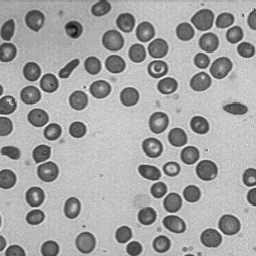


Accumulator image and input image with objects detected in given range of diameters.


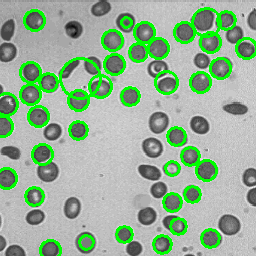

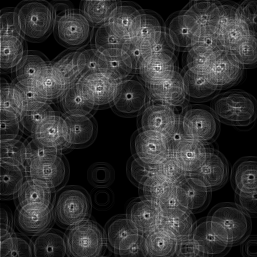

In [65]:
path = '/content/drive/MyDrive/3_hough/blood.png'
hough_assignment_3(path)

Original image


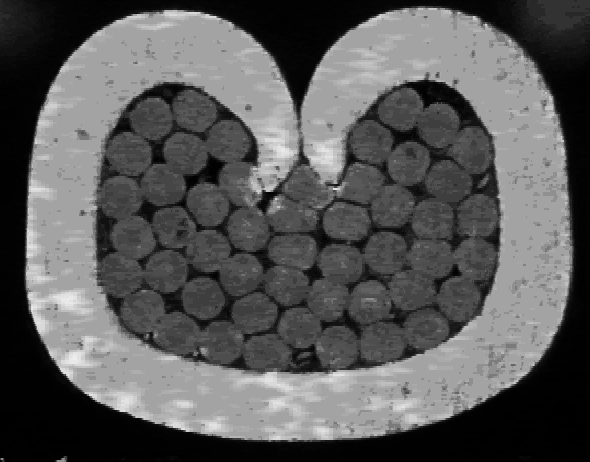


Accumulator image and input image with objects detected in given range of diameters.


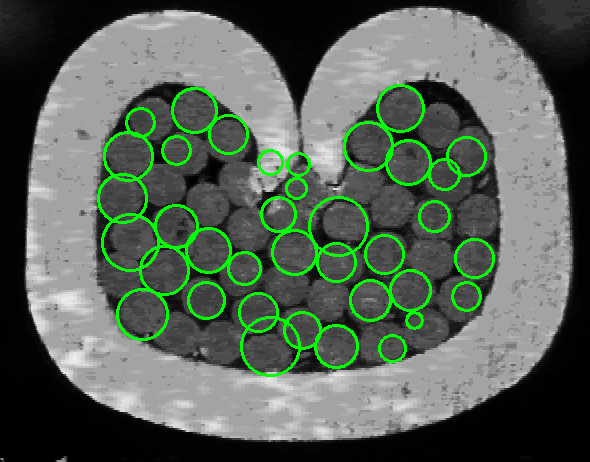

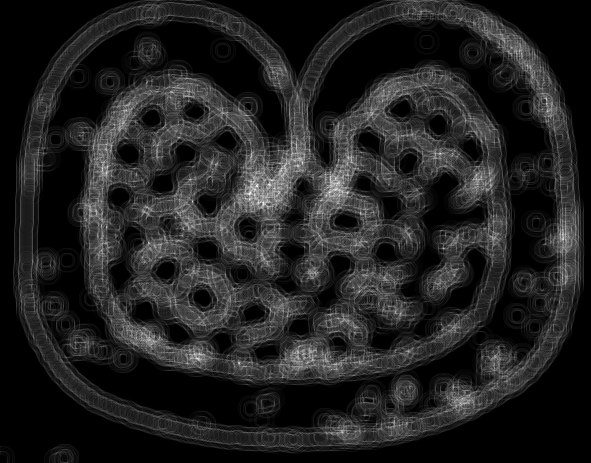

In [68]:
path = '/content/drive/MyDrive/3_hough/cable.png'
hough_assignment_3(path)

Original image


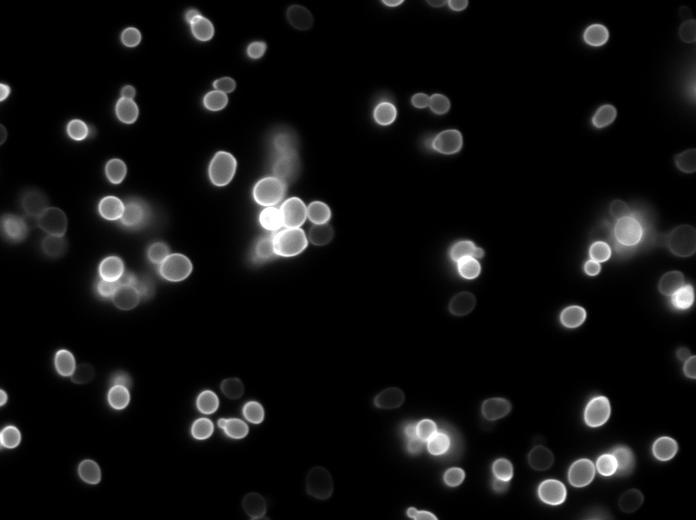


Accumulator image and input image with objects detected in given range of diameters.


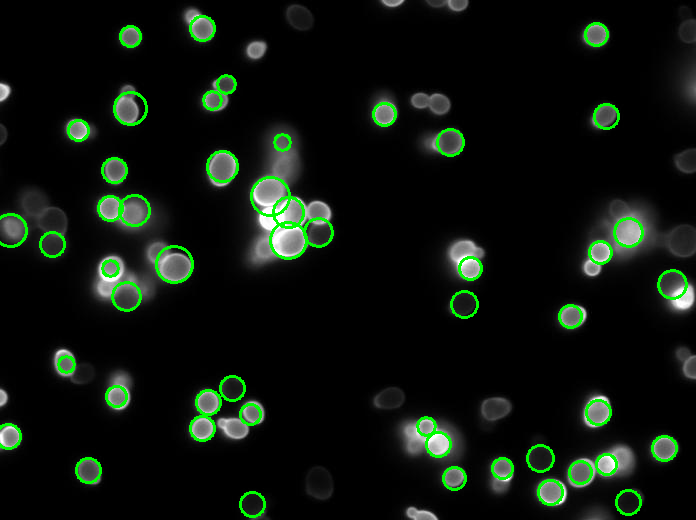

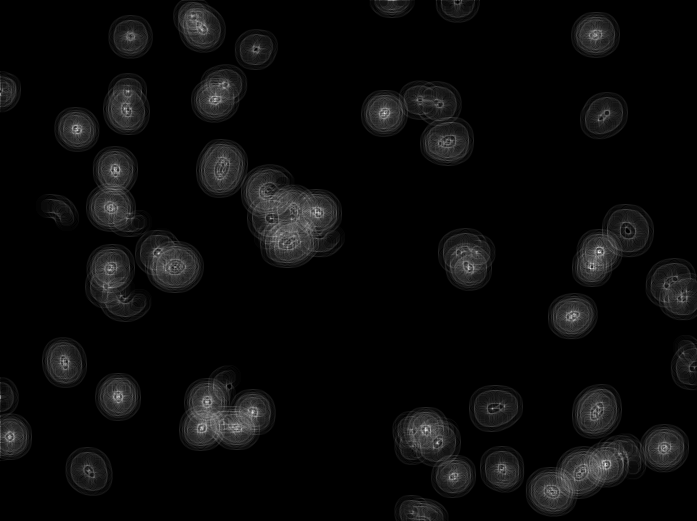

In [67]:
path = '/content/drive/MyDrive/3_hough/cells.png'
hough_assignment_3(path)

Original image


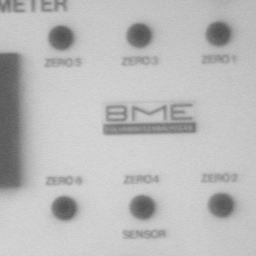


Accumulator image and input image with objects detected in given range of diameters.


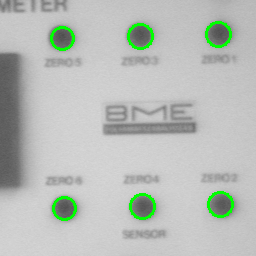

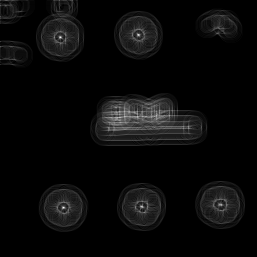

In [66]:
path = '/content/drive/MyDrive/3_hough/circles.png'
hough_assignment_3(path)